In [1]:
freq = 15

In [2]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils
from cg_ega.cg_ega import CG_EGA

In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [6]:
len(array_Xtest)

436603

In [7]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [8]:
len(array_Ytest)

436603

In [9]:
model = keras.models.load_model('modelos/modeloGeneral_completo/stacked_NO_dropout.h5')

In [10]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

# Predicción de todo el conjunto de pruebas generales

In [11]:
len(array_Ytest)

436603

13644/13644 [==============================] - 254s 18ms/step


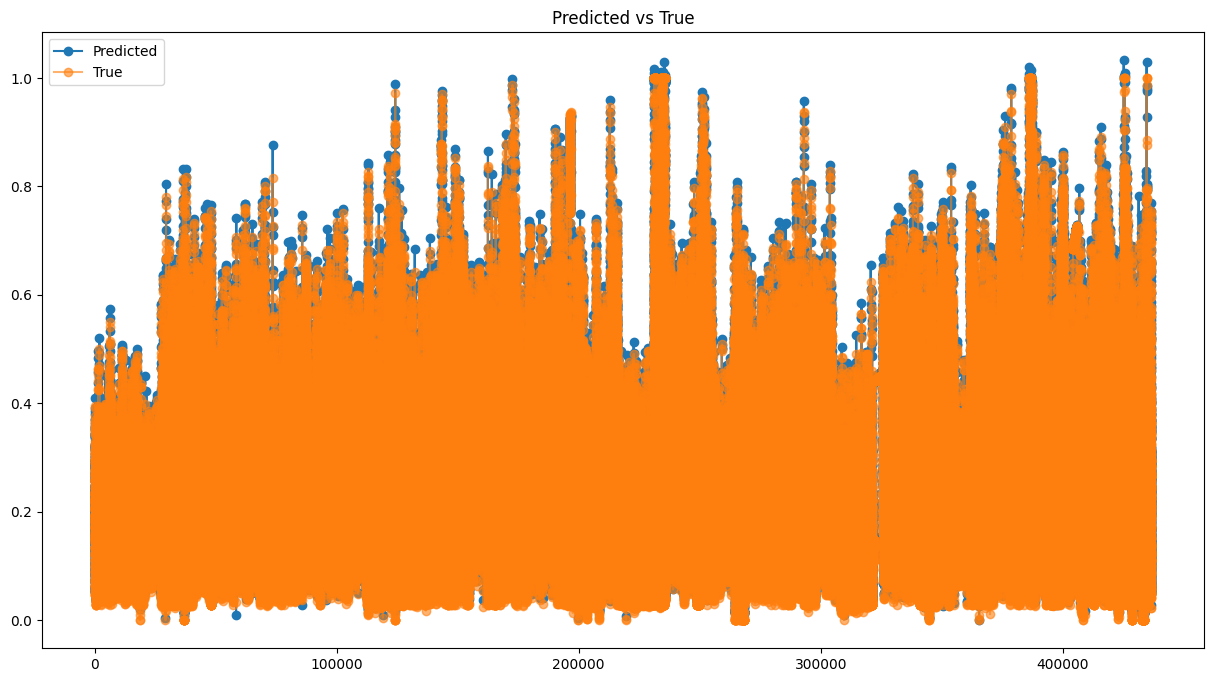

In [12]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [13]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.011659349669470841,
 'mse': 0.01692518127638255,
 'rmse': 0.0002864617612384105}

In [14]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
yhat_df = pd.DataFrame(yhat_scaled, columns=['Glucose level'])
yhat_df

Glucose level
0          142.578232
1          139.513596
2          140.194092
3          138.527176
4          150.559479
...               ...
436598     126.020393
436599     162.436813
436600     200.959106
436601     204.401840
436602     230.690247

[436603 rows x 1 columns]

In [15]:
array_Ytest_scaled=scalerGlucosa.inverse_transform(array_Ytest)
array_Ytest_df = pd.DataFrame(array_Ytest_scaled, columns=['Glucose level'])
array_Ytest_df

Glucose level
0               141.0
1               140.0
2               139.0
3               145.0
4               159.0
...               ...
436598          137.0
436599          177.0
436600          198.0
436601          216.0
436602          233.0

[436603 rows x 1 columns]

In [16]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=array_Ytest_df['Glucose level']
dfPlot['y_pred']=yhat_df['Glucose level']
dfPlot.index=pd.date_range("2023-01-01", periods=len(array_Ytest), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   141.0  142.578232
2023-01-01 00:15:00   140.0  139.513596
2023-01-01 00:30:00   139.0  140.194092
2023-01-01 00:45:00   145.0  138.527176
2023-01-01 01:00:00   159.0  150.559479
...                     ...         ...
2035-06-14 21:30:00   137.0  126.020393
2035-06-14 21:45:00   177.0  162.436813
2035-06-14 22:00:00   198.0  200.959106
2035-06-14 22:15:00   216.0  204.401840
2035-06-14 22:30:00   233.0  230.690247

[436603 rows x 2 columns]

AP, BE, EP: (0.9852107869409669, 0.012146073540661747, 0.002643139518371423)


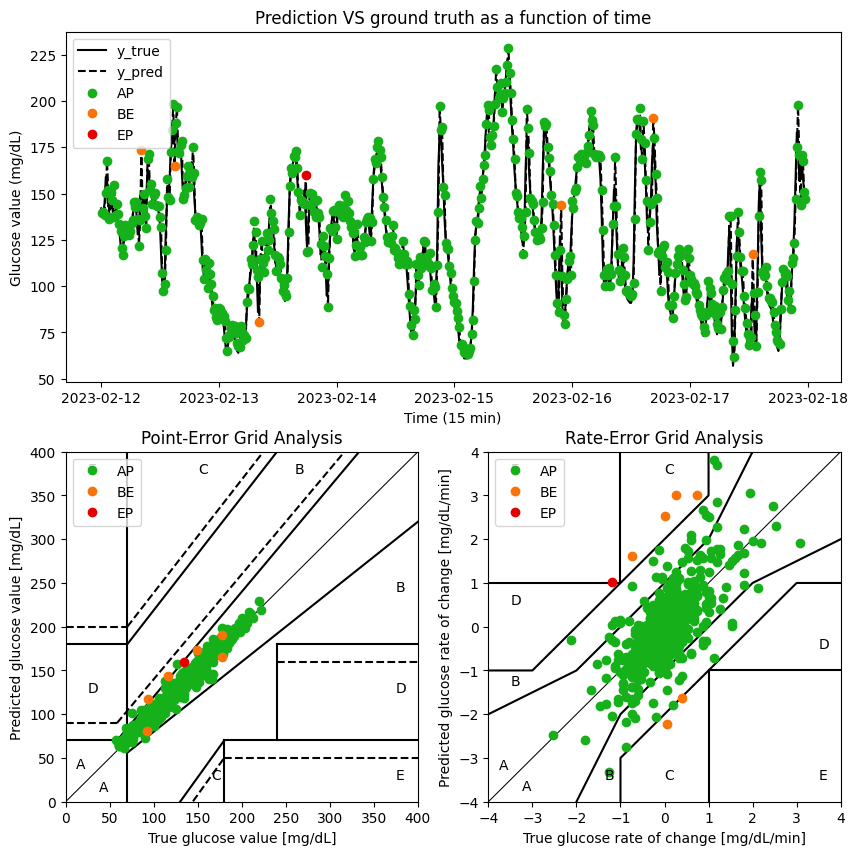

In [17]:
cg_ega = CG_EGA(dfPlot, 15)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

In [18]:
cg_ega.per_sample()

datetime  y_true      y_pred   dy_true   dy_pred CG_EGA  \
0      2023-02-12 00:00:00   141.0  142.578232       NaN       NaN    NaN   
1      2023-02-12 00:15:00   140.0  139.513596 -0.066667 -0.204309     AP   
2      2023-02-12 00:30:00   139.0  140.194092 -0.066667  0.045366     AP   
3      2023-02-12 00:45:00   145.0  138.527176  0.400000 -0.111128     AP   
4      2023-02-12 01:00:00   159.0  150.559479  0.933333  0.802154     AP   
...                    ...     ...         ...       ...       ...    ...   
436598 2035-07-26 21:30:00   137.0  126.020393  2.333333  2.507870     AP   
436599 2035-07-26 21:45:00   177.0  162.436813  2.666667  2.427761     AP   
436600 2035-07-26 22:00:00   198.0  200.959106  1.400000  2.568153     AP   
436601 2035-07-26 22:15:00   216.0  204.401840  1.200000  0.229516     AP   
436602 2035-07-26 22:30:00   233.0  230.690247  1.133333  1.752560     AP   

       P_EGA R_EGA  
0        NaN   NaN  
1          A     A  
2          A     A  
3          A     A  
4          A     A  
...      ...   ...  
436598     A     A  
436599     A     A  
436600     A     A  
436601     A     A  
436602     A     A  

[436603 rows x 8 columns]

# Predicción a 30 min del conjunto de pruebas generales

In [19]:
lenHorizonte=2
XTest=[]
YTest=[]
for i in range(lenHorizonte):
    XTest.append(array_Xtest[i]) 
    YTest.append(array_Ytest[i]) 
XTest=np.reshape(XTest, (lenHorizonte, array_Xtest.shape[1],array_Xtest.shape[2]))

df_YTest = pd.DataFrame(YTest, columns=['Glucose level True'])

YTest_scaled=scalerGlucosa.inverse_transform(YTest)
df_YTest_scaled = pd.DataFrame(YTest_scaled, columns=['Glucose level True']) 

In [20]:
yhat = model.predict(XTest)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 39ms/step


Glucose level Predict  Glucose level True
0               0.222996            0.219565
1               0.216334            0.217391

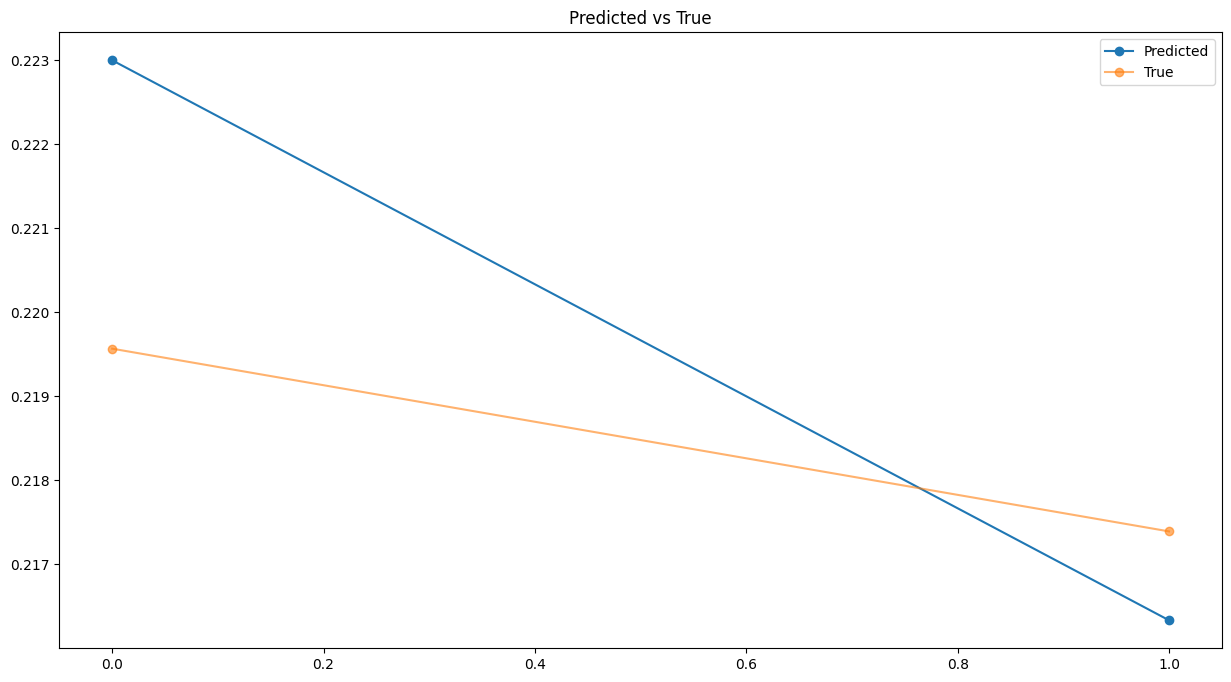

{'mae': 0.0022441757114037286,
 'mse': 0.002538649486060772,
 'rmse': 6.4447412130766215e-06}

In [21]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [22]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             142.578232               141.0
1             139.513596               140.0

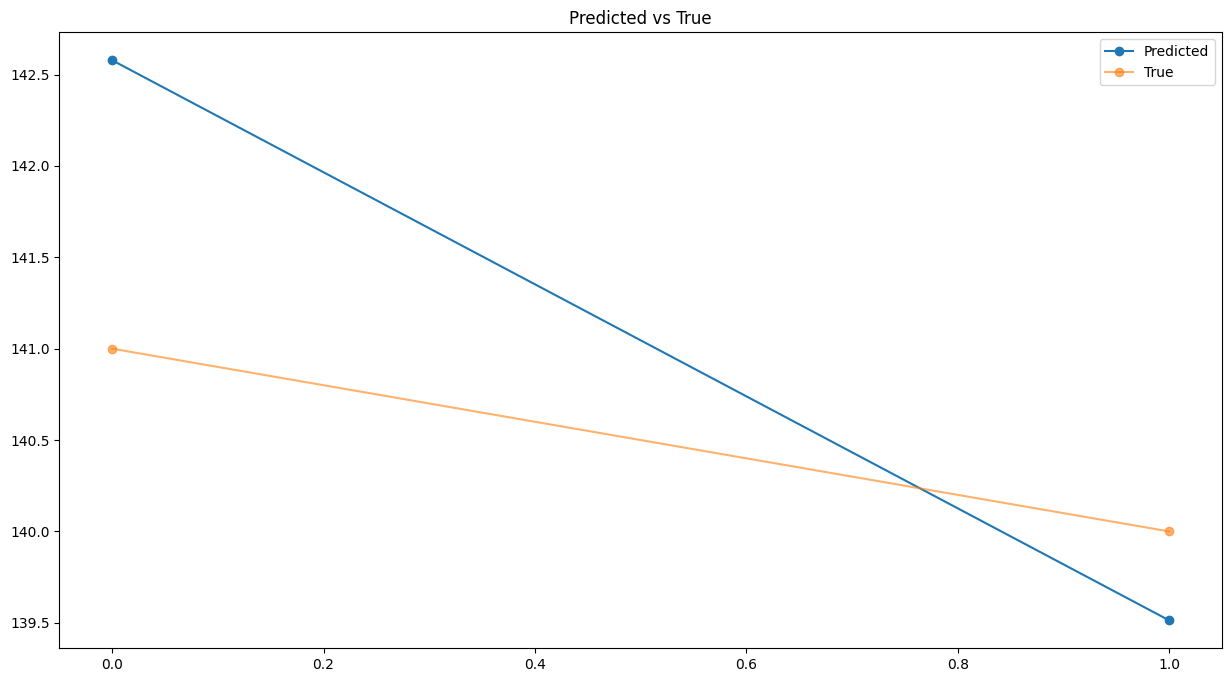

{'mae': 1.032318115234375,
 'mse': 1.1677767144608764,
 'rmse': 1.3637024548370391}

In [23]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción sobre predicción a 30 min del conjunto de pruebas generales

In [24]:
yhat=model_utils.predictionOverPrediction(XTest,model)
df_yhat = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_yhat.head()

df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 26ms/step


Glucose level Predict  Glucose level True
0               0.222996            0.219565
1               0.222669            0.217391

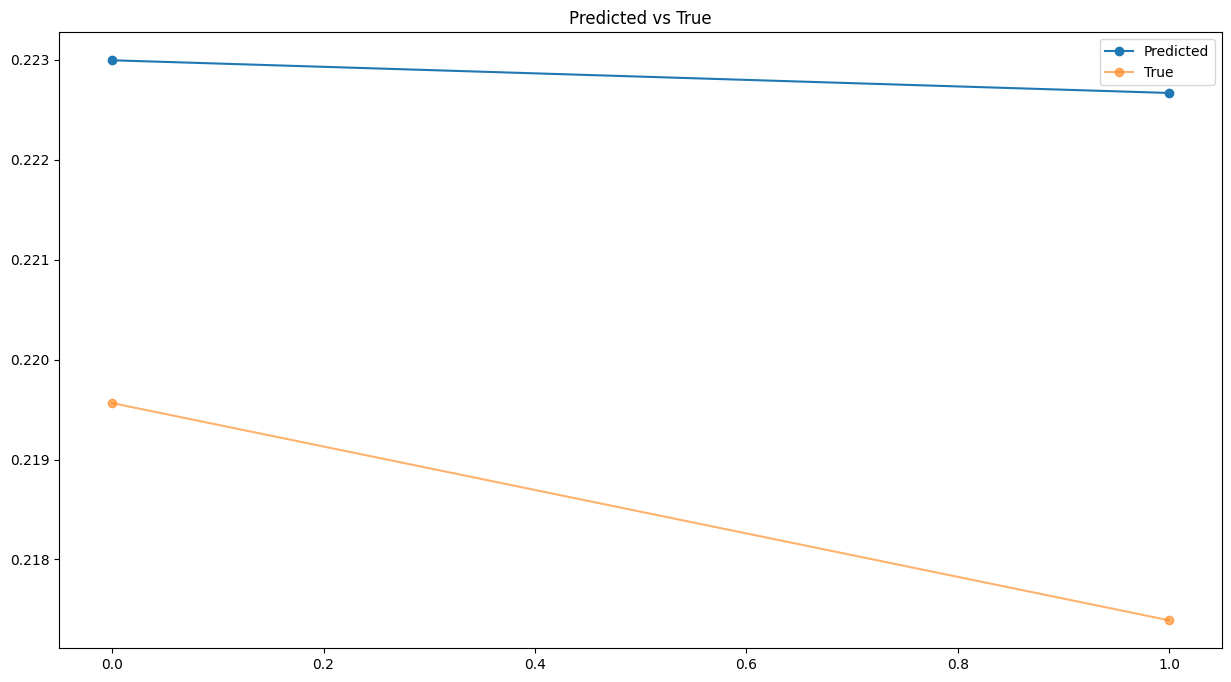

{'mae': 0.004354351823744551,
 'mse': 0.004451183679351709,
 'rmse': 1.9813036147327012e-05}

In [25]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [26]:
yhat_scaled=scalerGlucosa.inverse_transform(df_yhat) 

df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             142.578247               141.0
1             142.427765               140.0

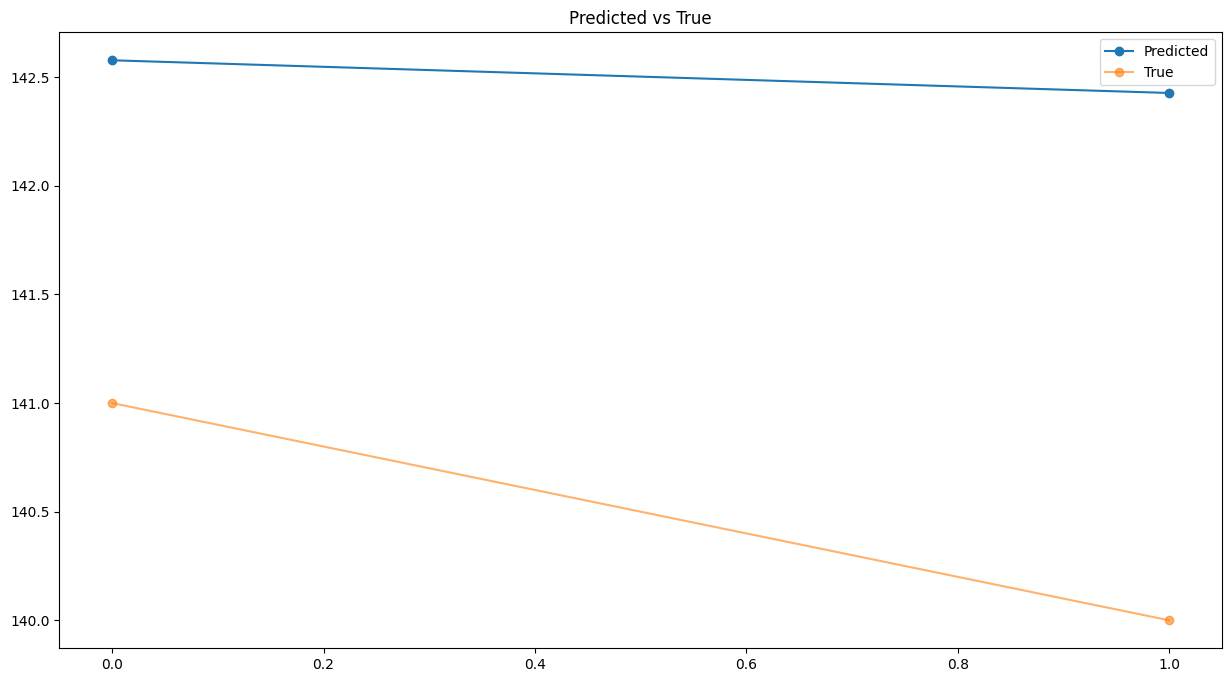

{'mae': 2.0030059814453125,
 'mse': 2.0475480688600287,
 'rmse': 4.192453094292432}

In [27]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción del conjunto pruebas del paciente 1

In [28]:
with open('dataset/generado/paciente1/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [29]:
with open('dataset/generado/paciente1/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [30]:
len(X)

191

In [31]:
len(Y)

191

In [32]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [33]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

6/6 [==============================] - 0s 7ms/step


Glucose level Predict  Glucose level True
0               0.227573            0.182609
1               0.151328            0.154348
2               0.156671            0.152174
3               0.156004            0.150000
4               0.150634            0.123913

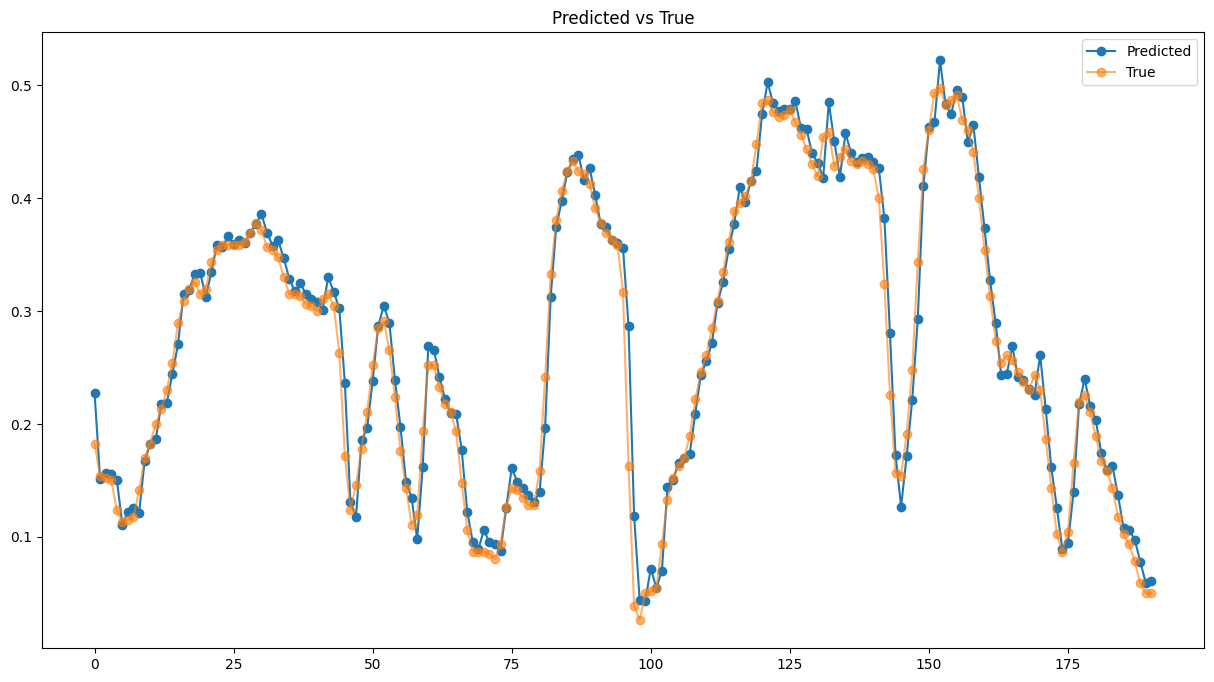

{'mae': 0.013854731270997202,
 'mse': 0.020063576029874713,
 'rmse': 0.00040254708310656314}

In [34]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

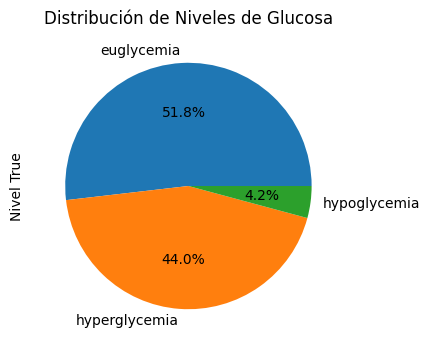

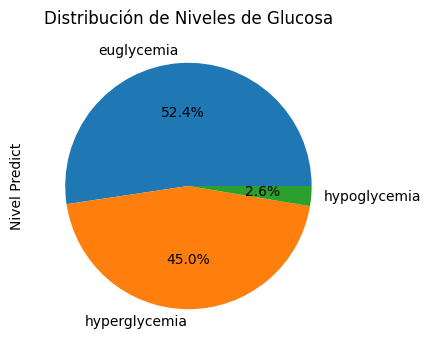

Glucose level True  Nivel True  Glucose level Predict Nivel Predict
0               124.0  euglycemia             144.683655    euglycemia
1               111.0  euglycemia             109.610825    euglycemia
2               110.0  euglycemia             112.068703    euglycemia
3               109.0  euglycemia             111.761780    euglycemia
4                97.0  euglycemia             109.291672    euglycemia

In [35]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


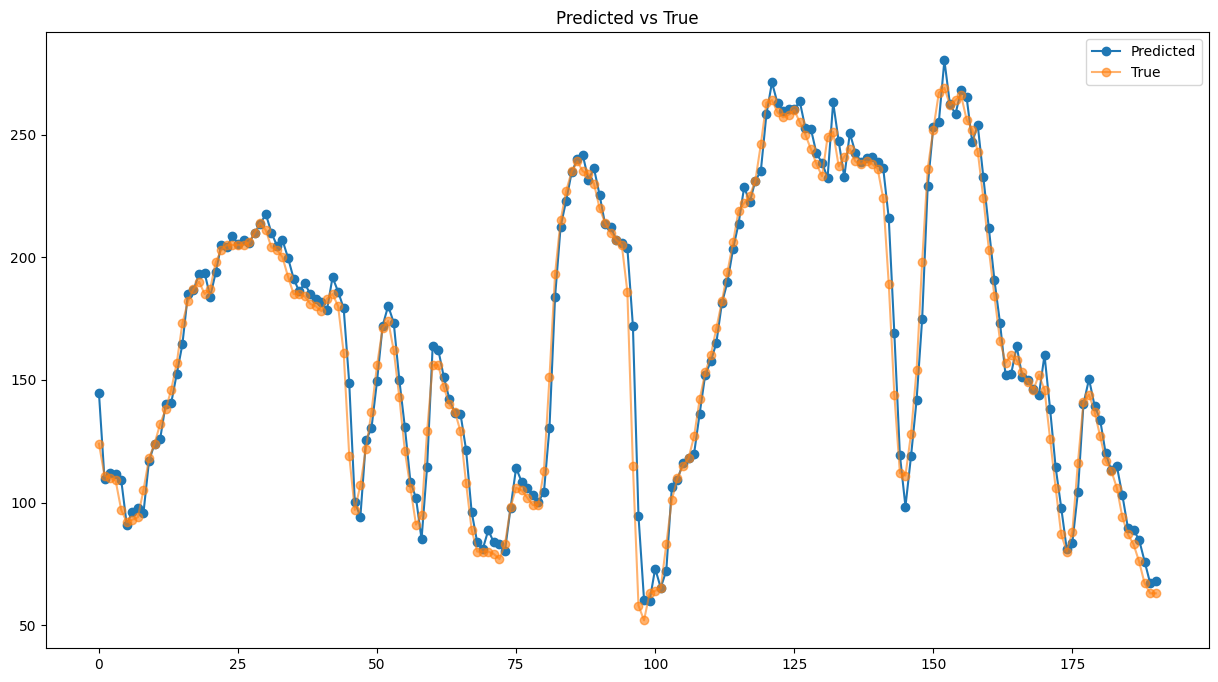

{'mae': 6.373176434901373, 'mse': 9.22924540278171, 'rmse': 85.17897070476735}

In [36]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [37]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   124.0  144.683655
2023-01-01 00:15:00   111.0  109.610825
2023-01-01 00:30:00   110.0  112.068703
2023-01-01 00:45:00   109.0  111.761780
2023-01-01 01:00:00    97.0  109.291672
...                     ...         ...
2023-01-02 22:30:00    83.0   88.765678
2023-01-02 22:45:00    76.0   84.878799
2023-01-02 23:00:00    67.0   75.879288
2023-01-02 23:15:00    63.0   67.062210
2023-01-02 23:30:00    63.0   67.978714

[191 rows x 2 columns]

AP, BE, EP: (0.9947368421052631, 0.0, 0.005263157894736842)


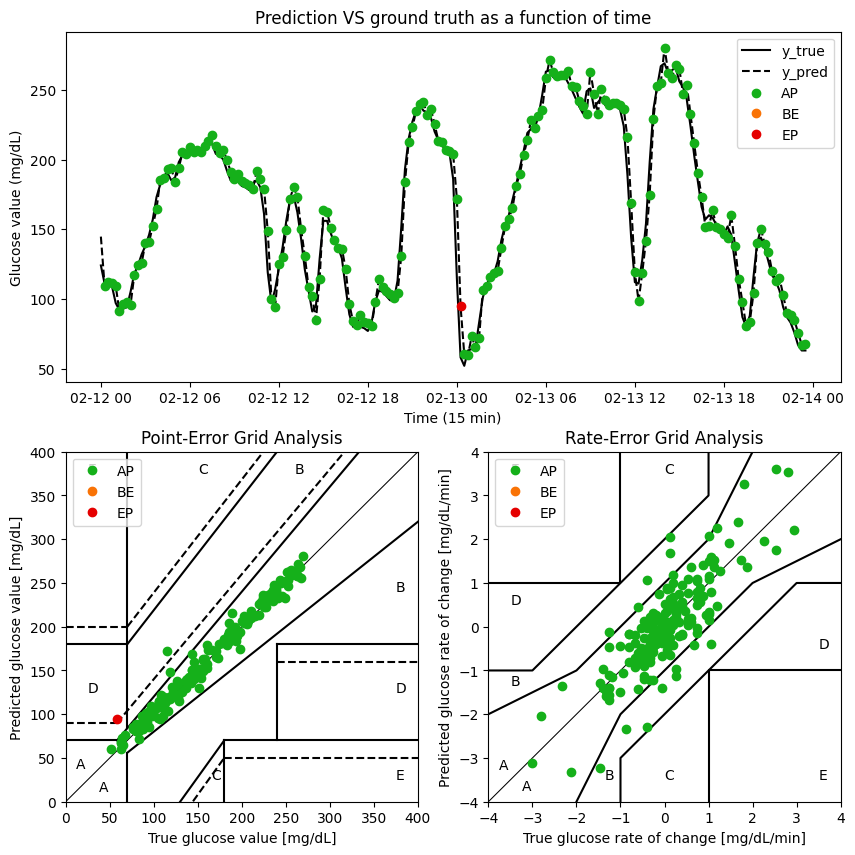

In [38]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 2

In [39]:
with open('dataset/generado/paciente2/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [40]:
with open('dataset/generado/paciente2/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [41]:
len(X)

1742

In [42]:
len(Y)

1742

In [43]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [44]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

55/55 [==============================] - 0s 8ms/step


Glucose level Predict  Glucose level True
0               0.372802            0.373913
1               0.391309            0.400000
2               0.421581            0.404348
3               0.405552            0.406522
4               0.417835            0.397826

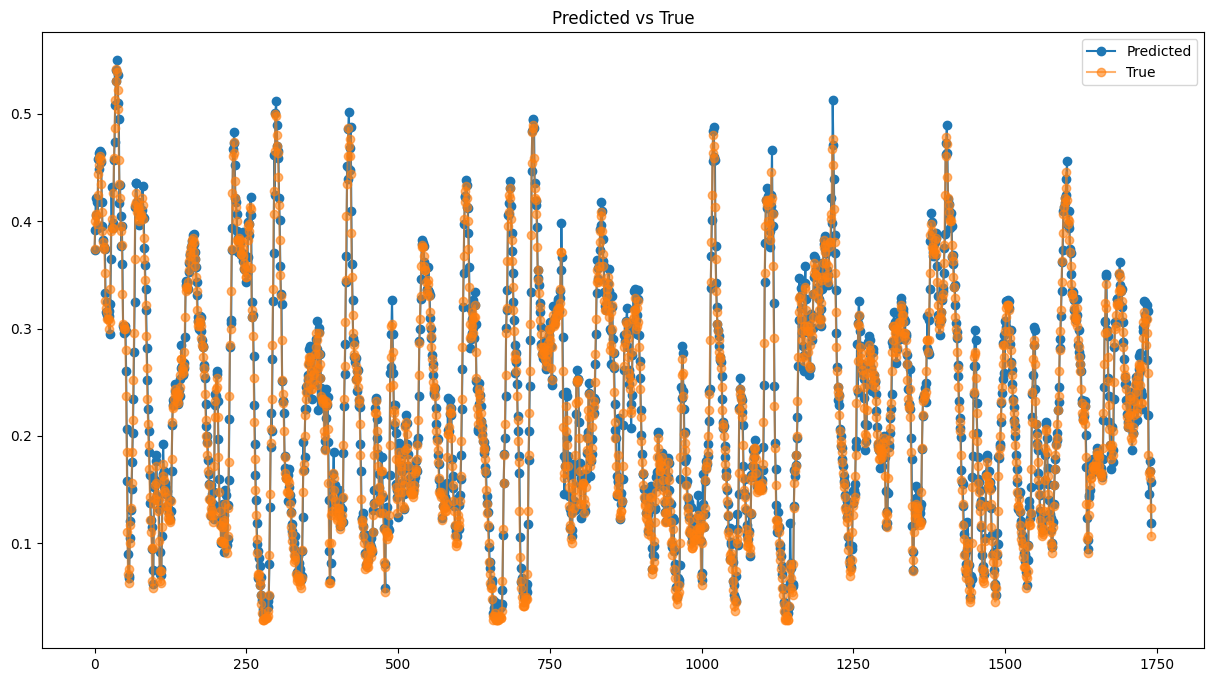

{'mae': 0.010020404004123249,
 'mse': 0.01303141011816766,
 'rmse': 0.00016981764966788248}

In [45]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

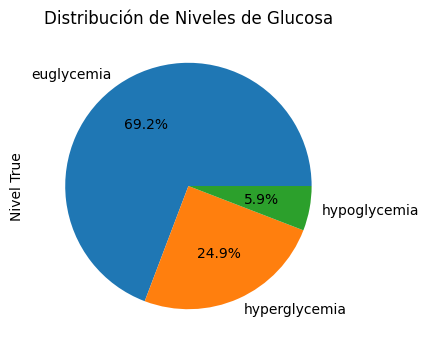

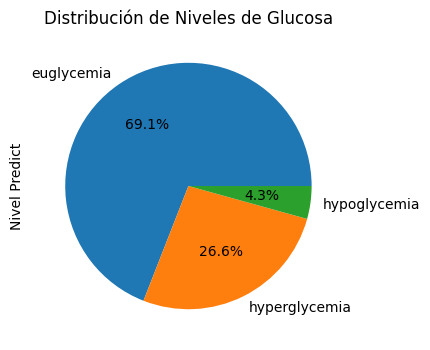

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               212.0  hyperglycemia             211.488968  hyperglycemia
1               224.0  hyperglycemia             220.001938  hyperglycemia
2               226.0  hyperglycemia             233.927216  hyperglycemia
3               227.0  hyperglycemia             226.554108  hyperglycemia
4               223.0  hyperglycemia             232.204254  hyperglycemia

In [46]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


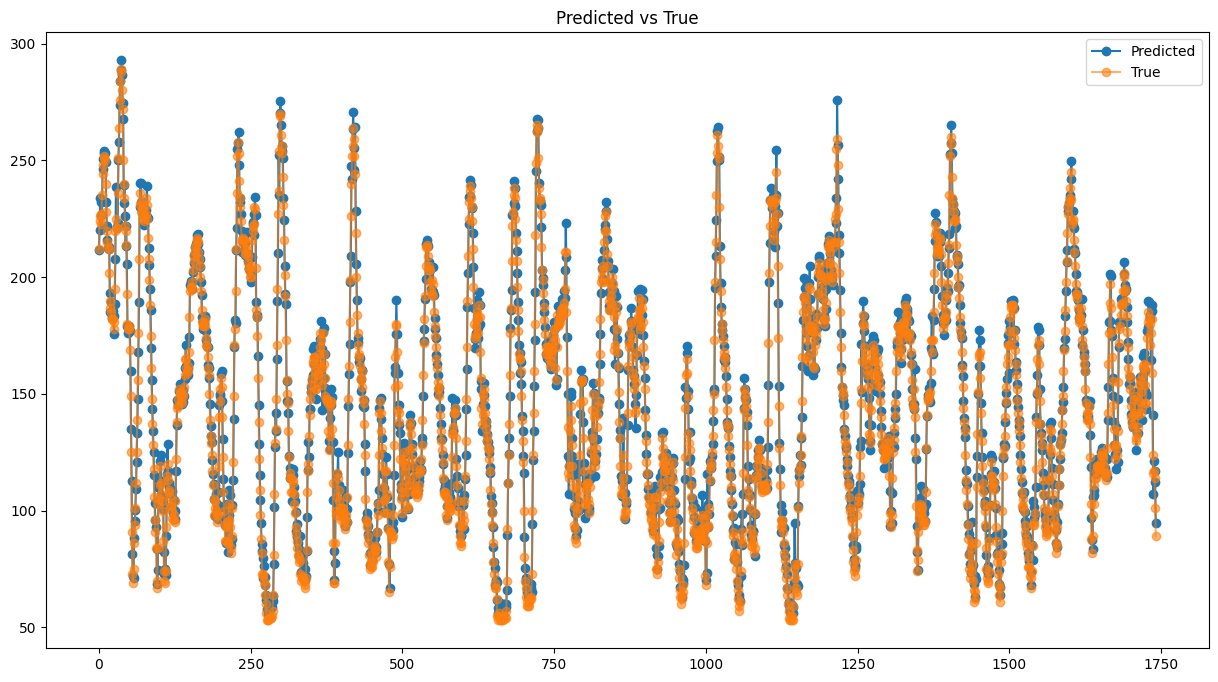

{'mae': 4.609385901450016, 'mse': 5.994448556761338, 'rmse': 35.93341349965809}

In [47]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [48]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   212.0  211.488968
2023-01-01 00:15:00   224.0  220.001938
2023-01-01 00:30:00   226.0  233.927216
2023-01-01 00:45:00   227.0  226.554108
2023-01-01 01:00:00   223.0  232.204254
...                     ...         ...
2023-01-19 02:15:00   116.0  107.249252
2023-01-19 02:30:00   117.0  121.077217
2023-01-19 02:45:00   114.0  116.906357
2023-01-19 03:00:00   101.0  112.437874
2023-01-19 03:15:00    89.0   94.512749

[1742 rows x 2 columns]

AP, BE, EP: (0.9942561746122918, 0.005169442848937392, 0.0005743825387708214)


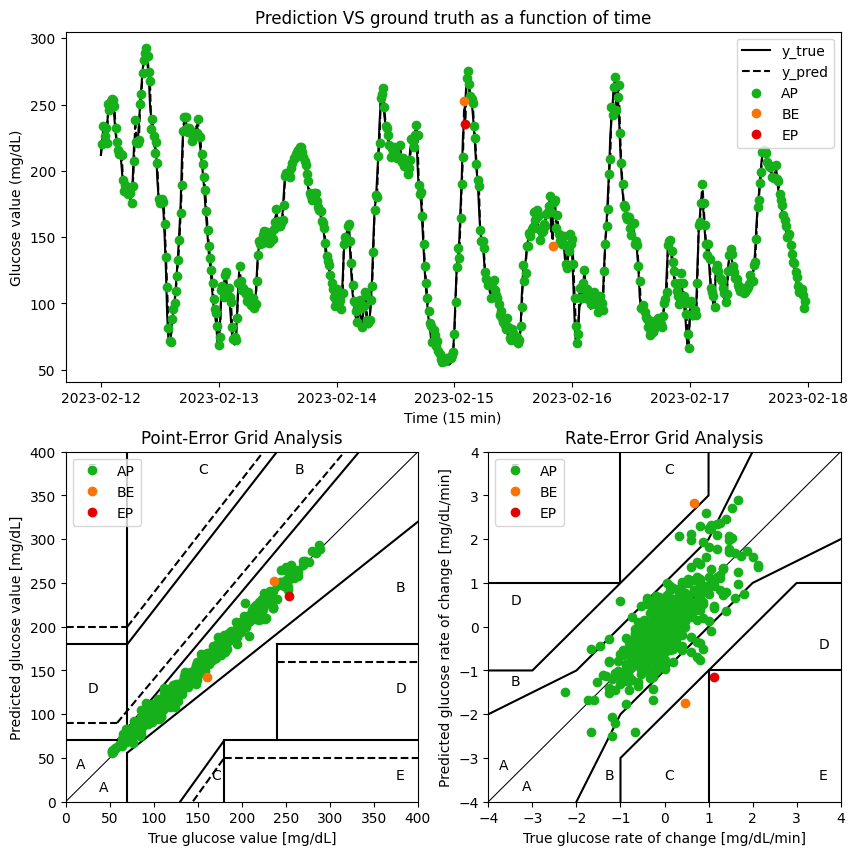

In [49]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 3

In [50]:
with open('dataset/generado/paciente3/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [51]:
with open('dataset/generado/paciente3/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [52]:
len(X)

3586

In [53]:
len(Y)

3586

In [54]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [55]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

113/113 [==============================] - 1s 9ms/step


Glucose level Predict  Glucose level True
0               0.268732            0.261858
1               0.236736            0.229051
2               0.205361            0.196245
3               0.172633            0.163439
4               0.145219            0.130632

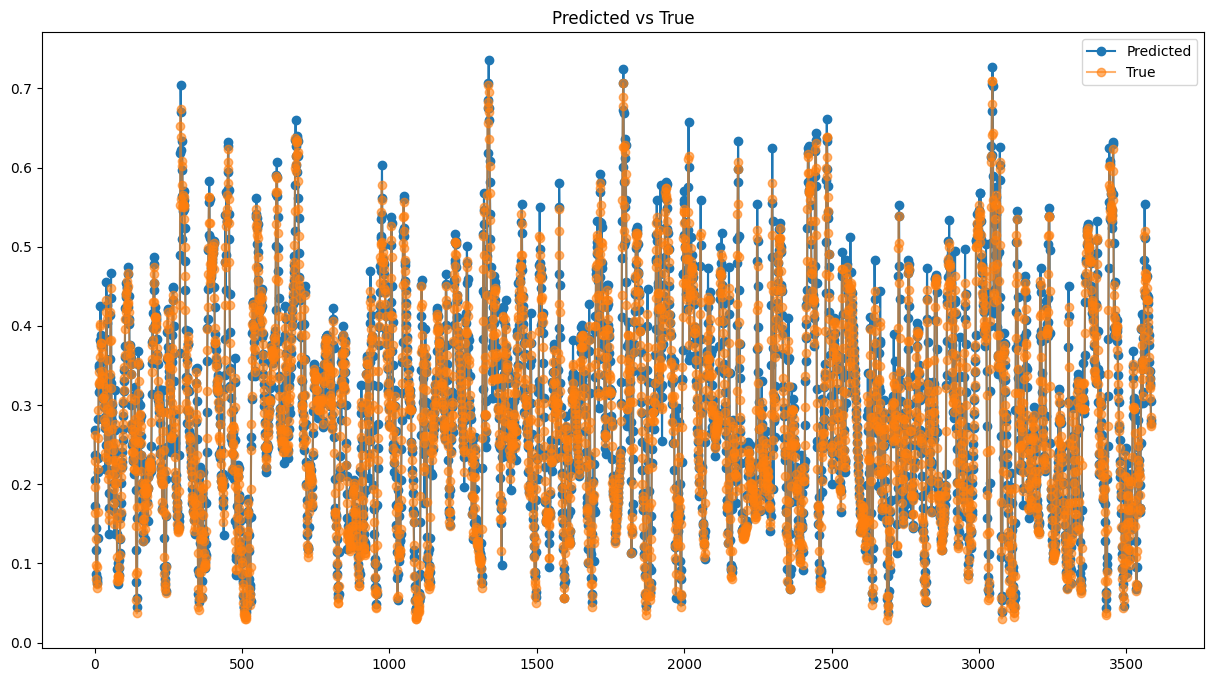

{'mae': 0.014848942400518823,
 'mse': 0.02048638521422044,
 'rmse': 0.00041969197914542986}

In [56]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

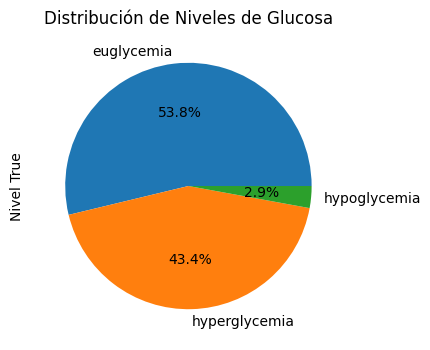

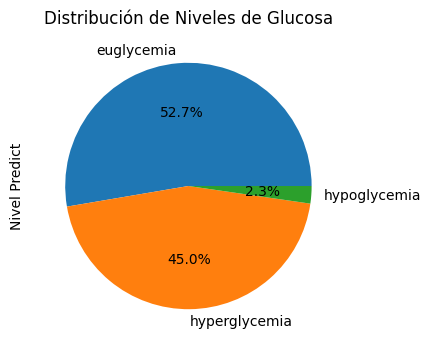

Glucose level True  Nivel True  Glucose level Predict Nivel Predict
0          160.454545  euglycemia             163.616928    euglycemia
1          145.363636  euglycemia             148.898529    euglycemia
2          130.272727  euglycemia             134.466049    euglycemia
3          115.181818  euglycemia             119.411026    euglycemia
4          100.090909  euglycemia             106.800720    euglycemia

In [57]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


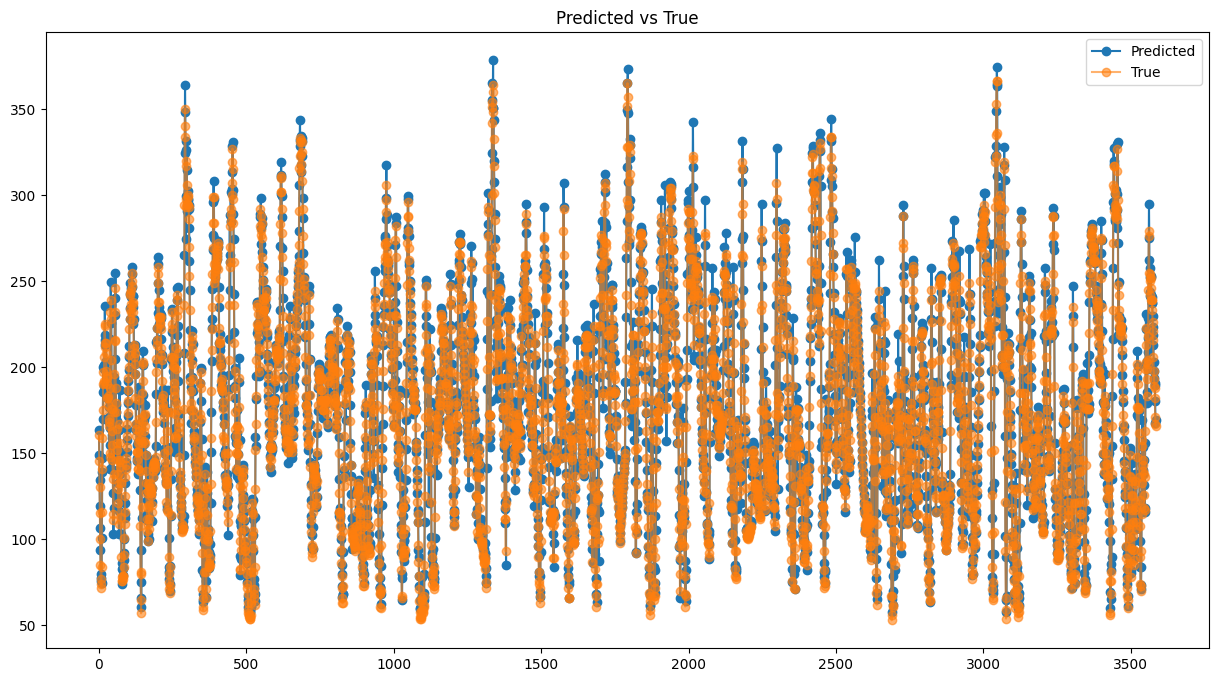

{'mae': 6.8305134931853715,
 'mse': 9.423736859348722,
 'rmse': 88.80681639424772}

In [58]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [59]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00  160.454545  163.616928
2023-01-01 00:15:00  145.363636  148.898529
2023-01-01 00:30:00  130.272727  134.466049
2023-01-01 00:45:00  115.181818  119.411026
2023-01-01 01:00:00  100.090909  106.800720
...                         ...         ...
2023-02-07 07:15:00  188.000000  189.876923
2023-02-07 07:30:00  182.000000  191.024750
2023-02-07 07:45:00  171.000000  180.428131
2023-02-07 08:00:00  167.000000  167.466339
2023-02-07 08:15:00  166.000000  169.471481

[3586 rows x 2 columns]

AP, BE, EP: (0.9743375174337517, 0.02203626220362622, 0.0036262203626220364)


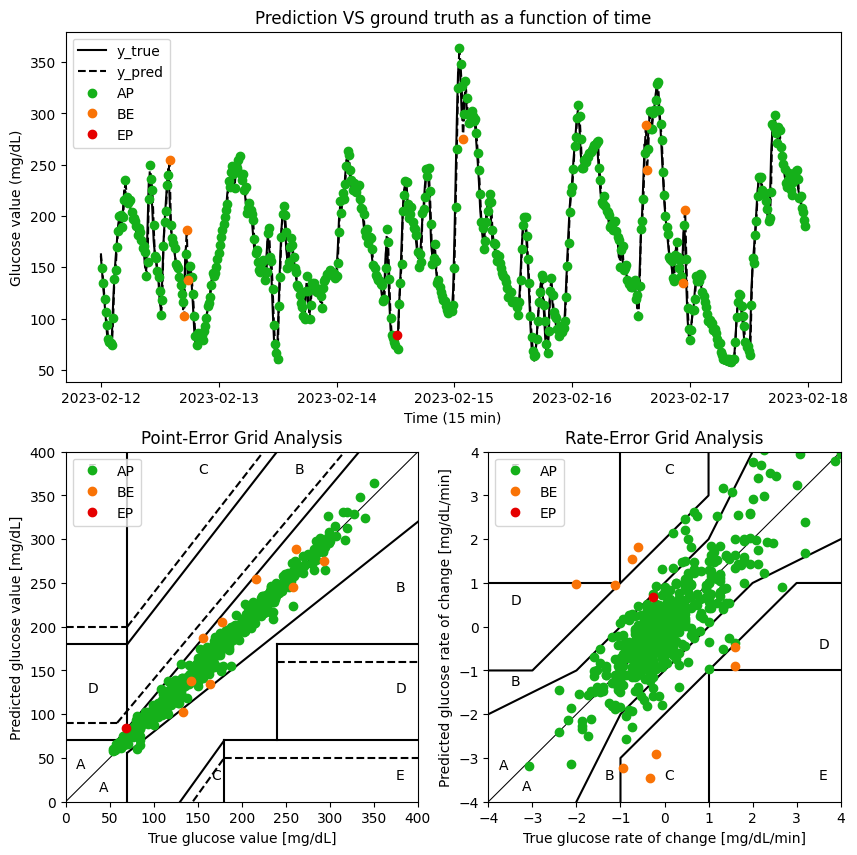

In [60]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 4

In [61]:
with open('dataset/generado/paciente4/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [62]:
with open('dataset/generado/paciente4/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [63]:
len(X)

6201

In [64]:
len(Y)

6201

In [65]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [66]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

194/194 [==============================] - 2s 9ms/step


Glucose level Predict  Glucose level True
0               0.548626            0.534783
1               0.534278            0.500000
2               0.477584            0.484783
3               0.487692            0.463043
4               0.441420            0.428261

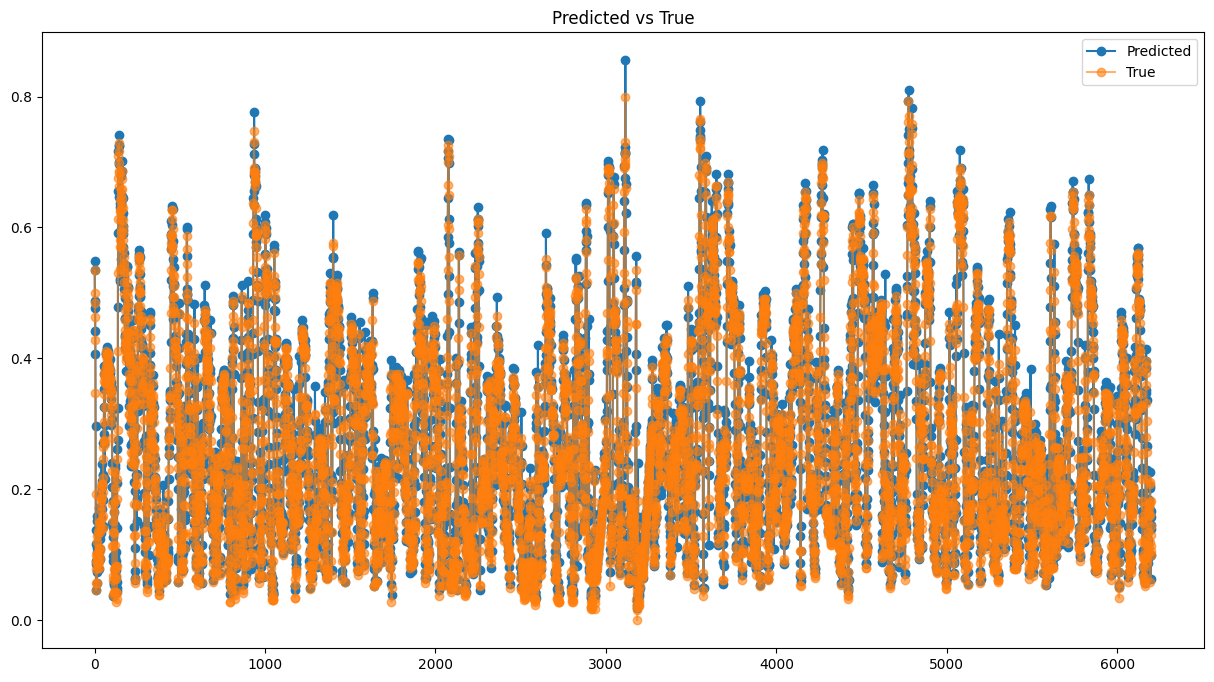

{'mae': 0.016893762870055402,
 'mse': 0.024090869117829004,
 'rmse': 0.0005803699748523672}

In [67]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

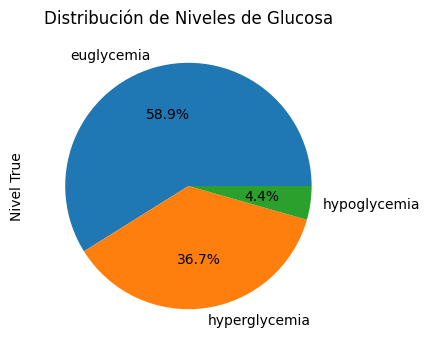

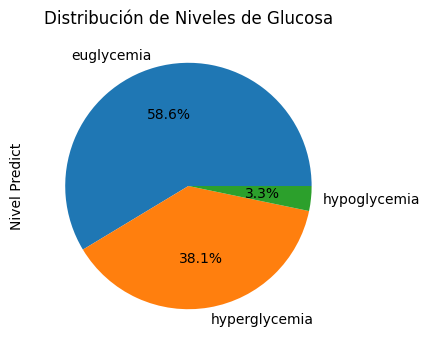

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               286.0  hyperglycemia             292.367828  hyperglycemia
1               270.0  hyperglycemia             285.767731  hyperglycemia
2               263.0  hyperglycemia             259.688660  hyperglycemia
3               253.0  hyperglycemia             264.338470  hyperglycemia
4               237.0  hyperglycemia             243.053421  hyperglycemia

In [68]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


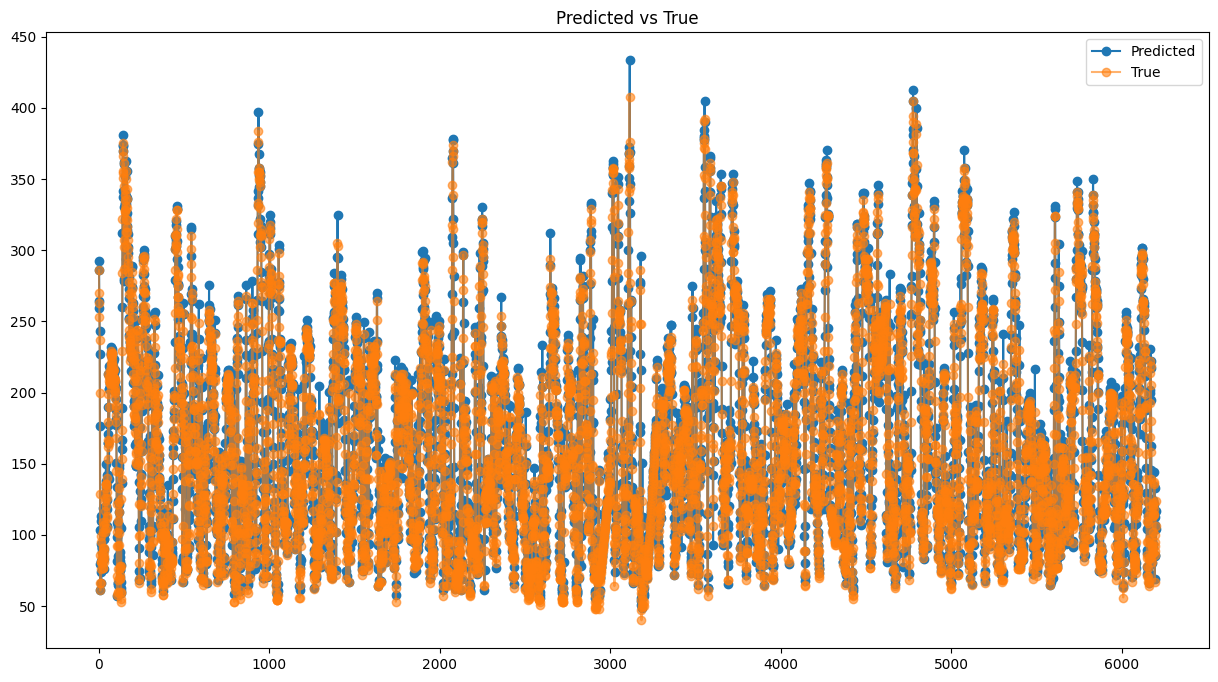

{'mae': 7.771130564486396,
 'mse': 11.08179951046886,
 'rmse': 122.80628039022785}

In [69]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [70]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   286.0  292.367828
2023-01-01 00:15:00   270.0  285.767731
2023-01-01 00:30:00   263.0  259.688660
2023-01-01 00:45:00   253.0  264.338470
2023-01-01 01:00:00   237.0  243.053421
...                     ...         ...
2023-03-06 13:00:00   100.0  112.811035
2023-03-06 13:15:00    89.0  106.905022
2023-03-06 13:30:00    92.0   85.670494
2023-03-06 13:45:00   106.0  103.940102
2023-03-06 14:00:00   124.0  117.048737

[6201 rows x 2 columns]

AP, BE, EP: (0.9662903225806452, 0.027580645161290322, 0.006129032258064516)


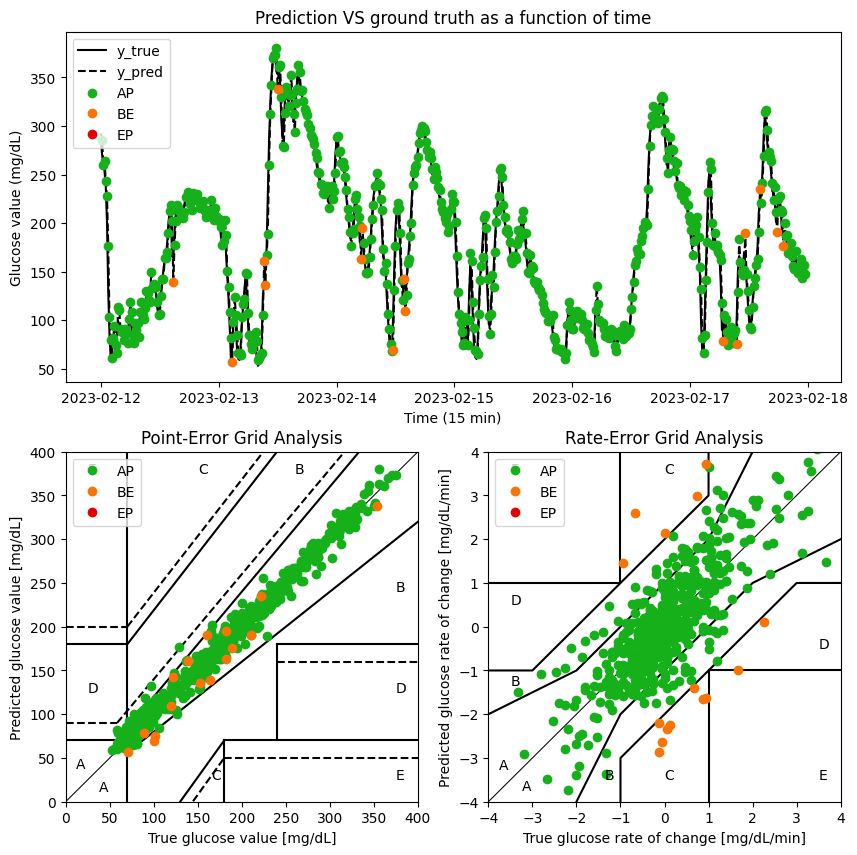

In [71]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)